In [1]:
from src.dataset.data_reader import BIDSDatasetReader
from src.dataset.data_loader import DataLoader

In [2]:
sub1 = BIDSDatasetReader(
    sub_id='01', ses_id='01'
)

╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Raw Data

Reading 0 ... 6306999  =      0.000 ...  6306.999 secs...


In [17]:
sub1.preprocess()

Preprocessing EEG

Setting Channels and Montage

Removing Bad Channels

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.3s


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.8 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 3 sensors
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


Removing Artifacts

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Omitting 399 of 6307000 (0.01%) samples, retaining 6306601 (99.99%) samples.
Selecting by number: 50 components
Fitting ICA took 550.4s.
Using EOG channels: EOG1, EOG2
Omitting 399 of 6307000 (0.01%) samples, retaining 6306601 (99.99%) samples.
Omitting 399 of 6307000 (0.01%) samples, retaining 6306601 (99.99%) samples.
Omitting 399 of 6307000 (0.01%) samples, retaining 6306601 (99.99%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.5s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Omitting 399 of 6307000 (0.01%) samples, retaining 6306601 (99.99%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Applying ICA to Raw instance
    Transforming to ICA space (50 components)
    Zeroing out 3 ICA components
    Projecting back using 62 PCA components


In [18]:
trial_mode='Silent'
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Audio'

In [20]:
data_loader =DataLoader(
    eeg_data=sub1.raw, trial_mode=trial_mode, trial_unit=trial_unit,
    experiment_mode=experiment_mode, trial_boundary=trial_boundary,
    trial_type=trial_type, modality=modality
)
covert = data_loader.create_epochs(tmin=-0.2, tmax=1.0)


╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Audio      ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 1201 original time points ...
0 bad epochs dropped


In [28]:
covert_erp = covert.average()

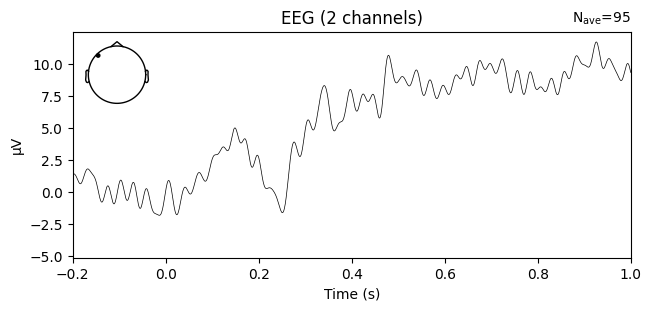

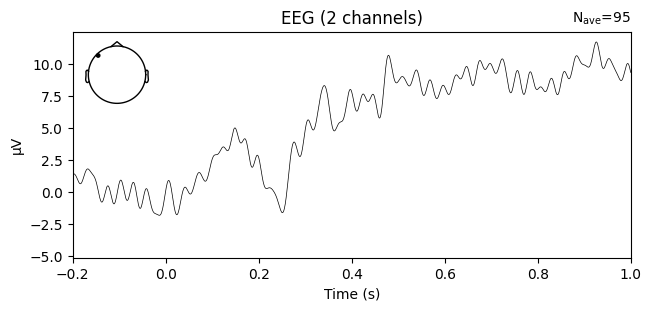

In [26]:
covert_erp.pick(['F3', 'F7']).plot()

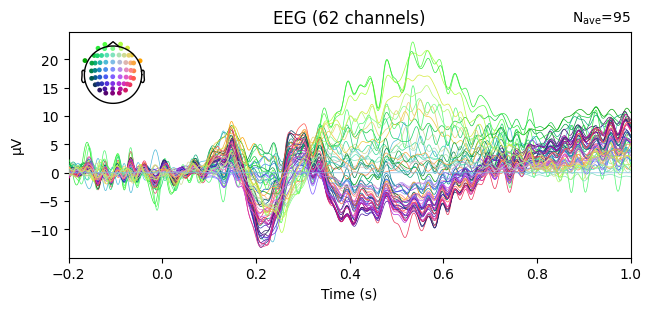

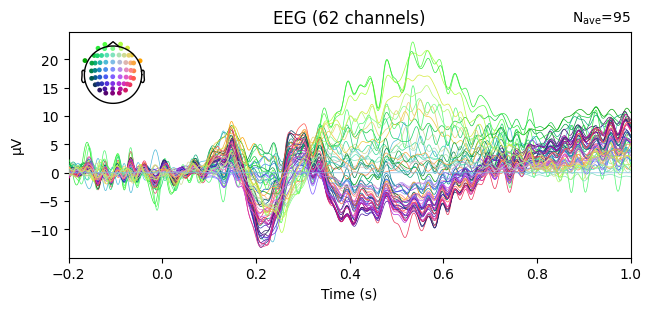

In [29]:
covert_erp.plot()

In [30]:
erp_data = covert_erp.get_data()
erp_data.shape

(62, 1201)

In [32]:
erp_data.mean(axis=0)

array([2.02562352e-07, 2.30211002e-07, 2.58951193e-07, ...,
       5.09569470e-06, 5.00847735e-06, 4.92804134e-06])

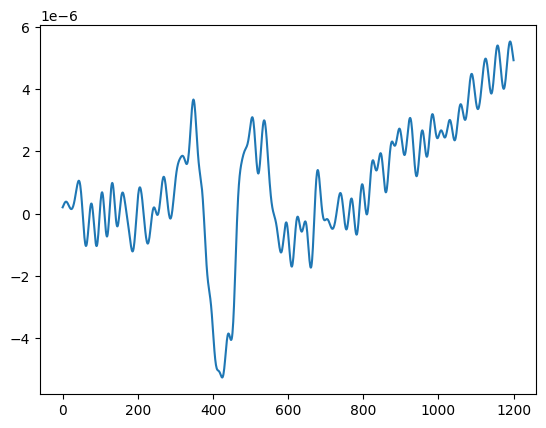

In [33]:
from matplotlib import pyplot as plt

plt.plot(erp_data.mean(axis=0))